# 1. LangChain 시작하기

1. LangChain 라이브러리: Python 및 JavaScript 라이브러리. 다양한 컴포넌트의 인터페이스와 통합, 이러한 컴포넌트를 체인과 에이전트로 결합하는 기본 런타임, 그리고 즉시 사용 가능한 체인과 에이전트의 구현을 포함합니다.

2. LangChain 템플릿: 다양한 작업을 위한 쉽게 배포할 수 있는 참조 아키텍처 모음입니다.

3. LangServe: LangChain 체인을 REST API로 배포하기 위한 라이브러리입니다.

4. LangSmith: 어떤 LLM 프레임워크에도 구축된 체인을 디버그, 테스트, 평가, 모니터링할 수 있게 해주며 LangChain과 원활하게 통합되는 개발자 플랫폼입니다.

5. LangGraph: LLM을 사용한 상태유지가 가능한 다중 액터 애플리케이션을 구축하기 위한 라이브러리로, LangChain 위에 구축되었으며 LangChain과 함께 사용하도록 설계되었습니다. 여러 계산 단계에서 다중 체인(또는 액터)을 순환 방식으로 조정할 수 있는 능력을 LangChain 표현 언어에 추가합니다.

OpenAI API
https://platform.openai.com/docs/overview


In [1]:
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
# import os
# print(f"[API KEY]\n{os.environ['OPENAI_API_KEY']}")

In [3]:
# pip install langchain-teddynote

In [4]:
from langchain_teddynote import logging

# Starts tracking the project
logging.langsmith("Project1")


LangSmith 추적을 시작합니다.
[프로젝트명]
Project1


In [5]:
# from langchain_teddynote import logging

# # set_enable=False stops
# logging.langsmith("Project1", set_enable=False)


#### ChatOpenAI : OpenAI's Chatbot LLM
    - temperatue : 0 ~ 2 창의성
    - max_tokens : 채팅 완성에 생성할 토큰의 최대개수
    - model_name : applicable models 
 https://platform.openai.com/docs/models


In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    temperature = 0.1, # 
    model_name = "gpt-3.5-turbo"
)

question = "대한민국의 수도는?"
print(f"[답변] : {llm.invoke(question)}")

[답변] : content='서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 18, 'total_tokens': 23}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-ad7b6f52-ac4d-429a-a77d-69ff80d95b5f-0' usage_metadata={'input_tokens': 18, 'output_tokens': 5, 'total_tokens': 23}


#### AI Message : OpenAI's Answering Machine

In [7]:
question = "대한민국의 수도는 어디인가요?"
response = llm.invoke(question)


In [8]:
response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 24, 'total_tokens': 39}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-9c6fe020-d30d-48a0-94bd-607f7c1c2a5f-0', usage_metadata={'input_tokens': 24, 'output_tokens': 15, 'total_tokens': 39})

In [9]:
response.content


'대한민국의 수도는 서울입니다.'

In [10]:
response.response_metadata


{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': None}

#### LogProb
주어진 텍스트에 대한 모델의 토큰 확률의 로그 값. 토큰이란 문장을 구성하는 개별 단어나 문자 등의 요소를 의미하고, 확률은 모델이 그 토큰을 예측할 확률.

In [11]:
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  
    max_tokens=2048,  
    model_name="gpt-3.5-turbo", 
).bind(logprobs=True)
question = "대한민국의 수도는 어디인가요?"
response = llm_with_logprob.invoke(question)
response.response_metadata

{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.047983073,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -1.6240566e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -3.1281633e-07,
    'top_logprobs': []},
   {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -4.604148e-06,
    'top_logprobs': []},
   {'token': ' 수',
    'bytes': [32, 236, 136, 152],
    'logprob': -6.704273e-07,
    'top_logprobs': []},
   {'token': '

#### Streaming

In [12]:
answer = llm.stream('대한민국 1대부터 10대 대통령 알려줘')
for token in answer:
    print(token.content, end="", flush = True)

1. 이승만
2. 윤보선
3. 박정희
4. 최규하 (임시)
5. 전두환
6. 노태우
7. 김영삼
8. 김대중
9. 노무현
10. 이명박

In [14]:
from langchain_teddynote.messages import stream_response

answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)


1. 경복궁 (서울특별시 종로구 사직로 161)
2. 부산 해운대해수욕장 (부산광역시 해운대구 해운대해변로 264)
3. 제주도 성산일출봉 (제주특별자치도 서귀포시 성산읍 일출로 284)
4. 경주 불국사 (경상북도 경주시 불국로 726)
5. 강원도 남이섬 (강원도 춘천시 남산면 남이섬길 1)
6. 전주 한옥마을 (전라북도 전주시 완산구 한지길 36)
7. 대구 이월드 (대구광역시 달서구 두류공원로 200)
8. 경기도 남한산성 (경기도 화성시 남양읍 남한산로 100)
9. 인천 중구 송도센트럴파크 (인천광역시 중구 송도동 센트럴로 123)
10. 대전 엑스포과학공원 (대전광역시 유성구 엑스포로 123)

#### Multi-modal
- Text
- Image
- Audio
- Video

In [15]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

llm = ChatOpenAI(
    temperature=0.1,  
    max_tokens=2048,  #
    model_name="gpt-4o",  
)

multimodal_llm = MultiModal(llm)


In [16]:
img= './economic_cal.png'


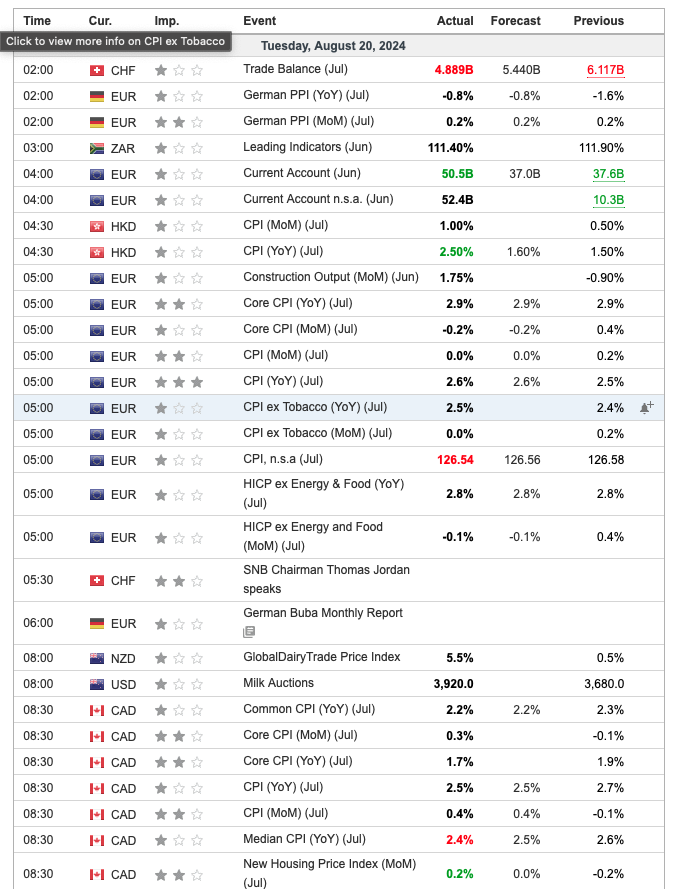

이 이미지는 2024년 8월 20일 화요일의 경제 지표 일정을 보여주는 표입니다. 표는 시간, 통화, 중요도, 이벤트, 실제 값, 예상 값, 이전 값을 포함한 여러 열로 구성되어 있습니다. 주요 내용은 다음과 같습니다:

- 02:00: 스위스 무역수지 (7월) - 실제: 4.889B, 예상: 5.440B, 이전: 6.117B
- 02:00: 독일 생산자물가지수 (PPI) 전년대비 (7월) - 실제: -0.8%, 예상: -0.8%, 이전: -1.6%
- 02:00: 독일 생산자물가지수 (PPI) 전월대비 (7월) - 실제: 0.2%, 예상: 0.2%, 이전: 0.2%
- 03:00: 남아프리카 공화국 선행지수 (6월) - 실제: 111.40%, 예상: 111.90%
- 04:00: 유로존 경상수지 (6월) - 실제: 50.5B, 예상: 37.0B, 이전: 37.6B
- 04:00: 유로존 경상수지 비조정 (6월) - 실제: 52.4B, 이전: 10.3B
- 04:30: 홍콩 소비자물가지수 (CPI) 전년대비 (7월) - 실제: 2.50%, 예상: 1.60%, 이전: 1.50%
- 05:00: 유로존 건설 생산 (전월대비) (6월) - 실제: 1.75%, 이전: 0.96%
- 05:00: 유로존 핵심 소비자물가지수 (CPI) 전년대비 (7월) - 실제: 2.9%, 예상: 2.9%, 이전: 2.9%
- 05:00: 유로존 소비자물가지수 (CPI) 전월대비 (7월) - 실제: -0.2%, 예상: -0.2%, 이전: 0.3%
- 05:00: 유로존 소비자물가지수 (CPI) 전년대비 (7월) - 실제: 2.6%, 예상: 2.6%, 이전: 2.5%
- 05:00: 유로존 담배 제외 소비자물가지수 (CPI) 전년대비 (7월) - 실제: 2.5%, 이전: 2.4%
- 05:00: 유로존 담배 제외 소비자물가지수 (CPI) 전월대비 (7월) - 실제: 0.0%, 이전: 0.2%
- 05:00: 유로존 소비자물가지수 비조정 (7월) - 실제: 126.54, 예상: 126.56,

In [18]:
answer = multimodal_llm.stream(img)
stream_response(answer)

#### System, User


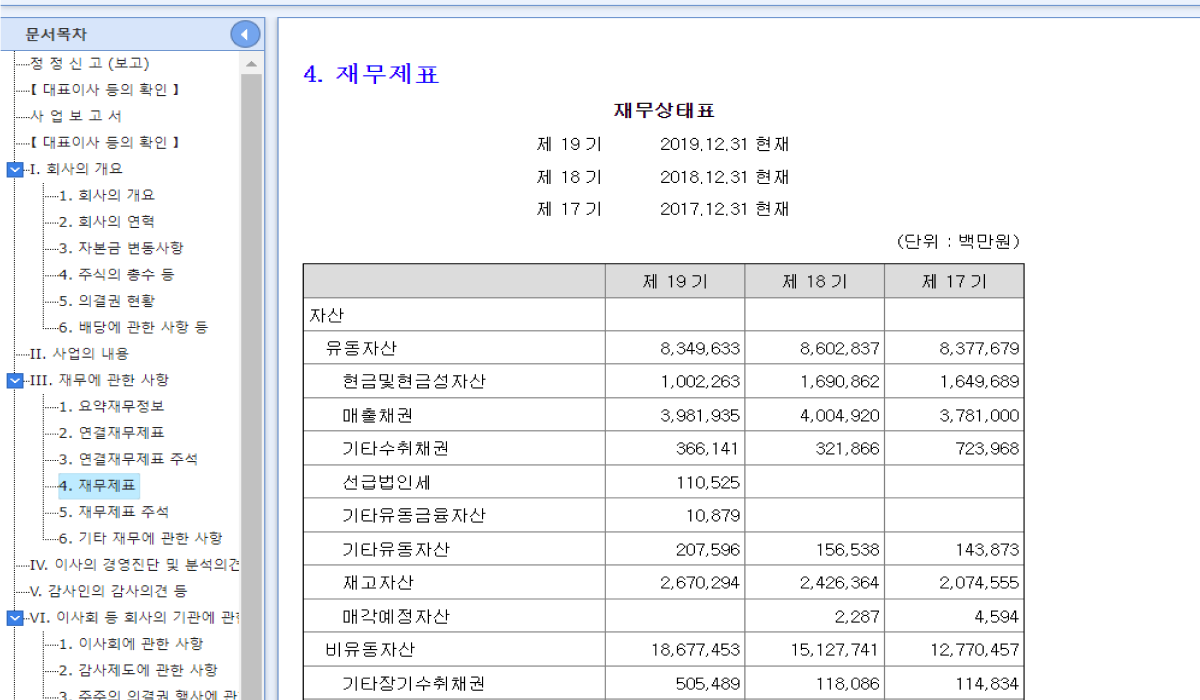

### Summary of Interesting Facts:

1. **Total Assets Trend**:
   - The company's total assets have shown a consistent increase over the three years. In 2017, the total assets were 21,148,136 million KRW, which increased to 23,730,290 million KRW in 2018 and further to 27,027,086 million KRW in 2019.

2. **Current Assets**:
   - Current assets have fluctuated slightly. In 2017, they were 8,377,679 million KRW, increased to 8,602,837 million KRW in 2018, and then decreased to 8,349,633 million KRW in 2019. This indicates some volatility in the company's liquid assets.

3. **Cash and Cash Equivalents**:
   - There has been a significant decrease in cash and cash equivalents from 2018 to 2019. In 2018, the company had 1,690,862 million KRW in cash and cash equivalents, which dropped to 1,002,263 million KRW in 2019. This could indicate a higher cash outflow or investments made during the year.

### Issues to be Concerned About When Investing:

1. **Decrease in Cash and Cash Equivalents**:


In [19]:
system_prompt = """You are a financial AI assistant that interprets tables (financial statements).
Your task is to kindly summarize interesting facts based on the given table-format financial statements."""

user_prompt = """The table provided to you is the company's financial statement. Please summarize interesting facts and give me 3 issue that i need to be concern when i invest in this company."""

multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

stream_response(answer)